<a href="https://colab.research.google.com/github/ammarchalifah/ammarchalifah.github.io/blob/master/Analisis_Coronavirus_Disease_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q geopandas

     |████████████████████████████████| 931kB 2.9MB/s 
     |████████████████████████████████| 10.4MB 16.7MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [0]:
from google.colab import files

uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

In [0]:
import io

confirmed=pd.read_csv(io.BytesIO(uploaded['time_series-ncov-Confirmed.csv']))
deaths=pd.read_csv(io.BytesIO(uploaded['time_series-ncov-Deaths.csv']))
recovered=pd.read_csv(io.BytesIO(uploaded['time_series-ncov-Recovered.csv']))

In [0]:
deathstoday=deaths.loc[deaths['Date']=='2020-03-21']
recoveredtoday=recovered.loc[recovered['Date']=='2020-03-21']
confirmedtoday=confirmed.loc[confirmed['Date']=='2020-03-21']

In [0]:
confirmedtoday=confirmedtoday[['Country/Region','Value']]
deathstoday=deathstoday[['Country/Region','Value']]
recoveredtoday=recoveredtoday[['Country/Region','Value']]

In [0]:
todaycondition=confirmedtoday.join(deathstoday,lsuffix='_confirmed',rsuffix='_deaths')

In [182]:
todaycondition=todaycondition.join(recoveredtoday,rsuffix='_recovered')
todaycondition

,Country/Region_confirmed,Value_confirmed,Country/Region_deaths,Value_deaths,Country/Region,Value
1,Afghanistan,24,Afghanistan,0,Afghanistan,1
61,Albania,76,Albania,2,Albania,2
121,Algeria,139,Algeria,15,Algeria,32
181,Andorra,88,Andorra,0,Andorra,1
241,Angola,2,Angola,0,Angola,0
...,...,...,...,...,...,...
28621,Uzbekistan,43,Uzbekistan,0,Uzbekistan,0
28681,Venezuela,70,Venezuela,0,Venezuela,0
28741,Vietnam,94,Vietnam,0,Vietnam,17
28801,Zambia,2,Zambia,0,Zambia,0


In [183]:
todaycondition=todaycondition.rename(columns={'Value':'Value_recovered'})

todaycondition['Value_recovered']=pd.to_numeric(todaycondition['Value_recovered'])
todaycondition['Value_deaths']=pd.to_numeric(todaycondition['Value_deaths'])
todaycondition['Value_confirmed']=pd.to_numeric(todaycondition['Value_confirmed'])

todaycondition=todaycondition.groupby('Country/Region')[['Value_confirmed','Value_deaths','Value_recovered']].sum()
todaycondition

,Value_confirmed,Value_deaths,Value_recovered
Country/Region,,,
Afghanistan,24,0,1
Albania,76,2,2
Algeria,139,15,32
Andorra,88,0,1
Angola,2,0,0
...,...,...,...
Uzbekistan,43,0,0
Venezuela,70,0,0
Vietnam,94,0,17


In [100]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
todaycondition.to_csv('ncov-2020-03-21.csv')
!cp ncov-2020-03-21.csv "drive/My Drive"

In [107]:
uploaded2=files.upload()

for fn in uploaded2.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded2[fn])
  ))

Saving POP_TOTAL_DS2_en_v2.csv to POP_TOTAL_DS2_en_v2.csv
User uploaded file "POP_TOTAL_DS2_en_v2.csv" with length 135266 bytes


In [108]:
population=pd.read_csv(io.BytesIO(uploaded2['POP_TOTAL_DS2_en_v2.csv']))
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,58724.0,59065.0,59438.0,59849.0,60239.0,60525.0,60655.0,60589.0,60366.0,60106.0,59978.0,60096.0,60567.0,61344.0,62204.0,62831.0,63028.0,62644.0,61835.0,61077.0,61032.0,62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,85447.0,87276.0,89004.0,90858.0,92894.0,94995.0,97015.0,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN
1,Andorra,AND,"Population, total",SP.POP.TOTL,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,23061.0,24279.0,25560.0,26892.0,28231.0,29514.0,30706.0,31781.0,32769.0,33746.0,34819.0,36063.0,37502.0,39112.0,40862.0,42704.0,44597.0,46515.0,48458.0,50431.0,52449.0,54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,64147.0,63888.0,64161.0,65399.0,67770.0,71046.0,74783.0,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,10849510.0,11121097.0,11412821.0,11716896.0,12022514.0,12315553.0,12582954.0,12831361.0,13056499.0,13222547.0,13283279.0,13211412.0,12996923.0,12667001.0,12279095.0,11912510.0,11630498.0,11438949.0,11337932.0,11375768.0,11608351.0,12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,18034130.0,18511480.0,19038420.0,19701940.0,20531160.0,21487079.0,22507368.0,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN
3,Angola,AGO,"Population, total",SP.POP.TOTL,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,6177703.0,6300969.0,6437645.0,6587647.0,6750215.0,6923749.0,7107334.0,7299508.0,7501320.0,7717139.0,7952882.0,8211950.0,8497950.0,8807511.0,9128655.0,9444918.0,9745209.0,10023700.0,10285712.0,10544904.0,10820992.0,11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,13801868.0,14187710.0,14601983.0,15058638.0,15562791.0,16109696.0,16691395.0,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN


In [118]:
populationnewest=population[['Country Name','Country Code','2015']]
populationnewest

,Country Name,Country Code,2015
0,Aruba,ABW,103889.0
1,Andorra,AND,70473.0
2,Afghanistan,AFG,32526562.0
3,Angola,AGO,25021974.0
4,Albania,ALB,2889167.0
...,...,...,...
259,"Yemen, Rep.",YEM,26832215.0
260,South Africa,ZAF,54956920.0
261,"Congo, Dem. Rep.",COD,77266814.0
262,Zambia,ZMB,16211767.0


In [184]:
todaycondition

,Value_confirmed,Value_deaths,Value_recovered
Country/Region,,,
Afghanistan,24,0,1
Albania,76,2,2
Algeria,139,15,32
Andorra,88,0,1
Angola,2,0,0
...,...,...,...
Uzbekistan,43,0,0
Venezuela,70,0,0
Vietnam,94,0,17


In [0]:
populationnewest['Country Name'].unique()

In [185]:
todaycondition.index.unique()

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=166)

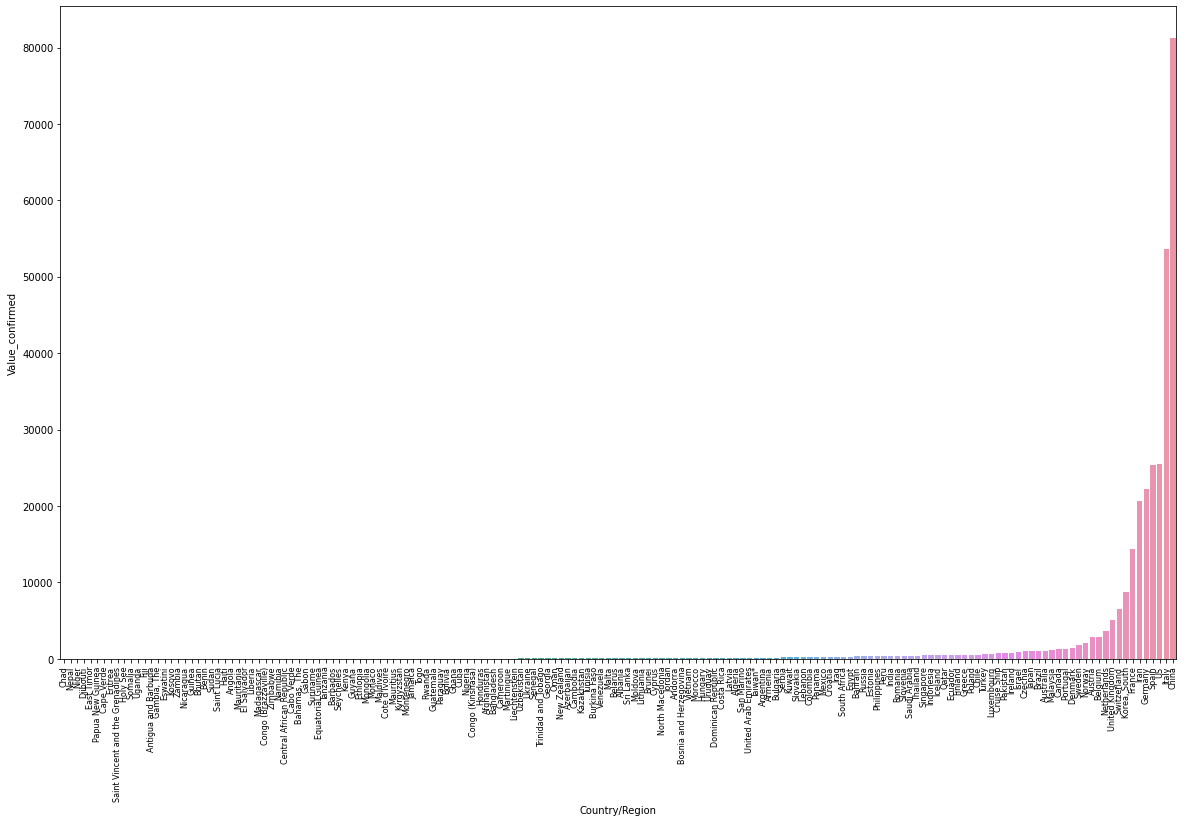

In [144]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
sns.barplot(x=todaycondition.sort_values(by='Value_confirmed').index,y=todaycondition.sort_values(by='Value_confirmed')['Value_confirmed'])
plt.show()

In [0]:
top10confirmed=['China','Italy','US','Spain','Germany','Iran','France','Korea, South','Switzerland','United Kingdom']

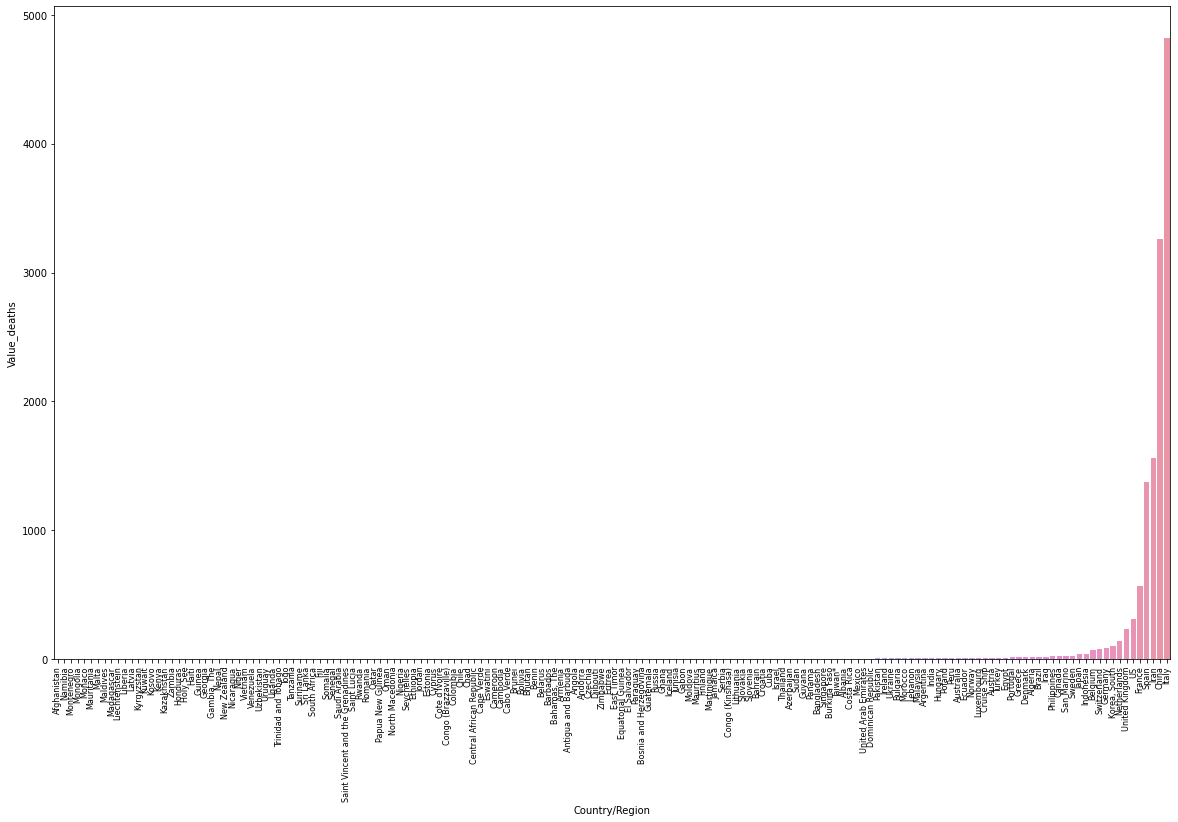

In [146]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
sns.barplot(x=todaycondition.sort_values(by='Value_deaths').index,y=todaycondition.sort_values(by='Value_deaths')['Value_deaths'])
plt.show()

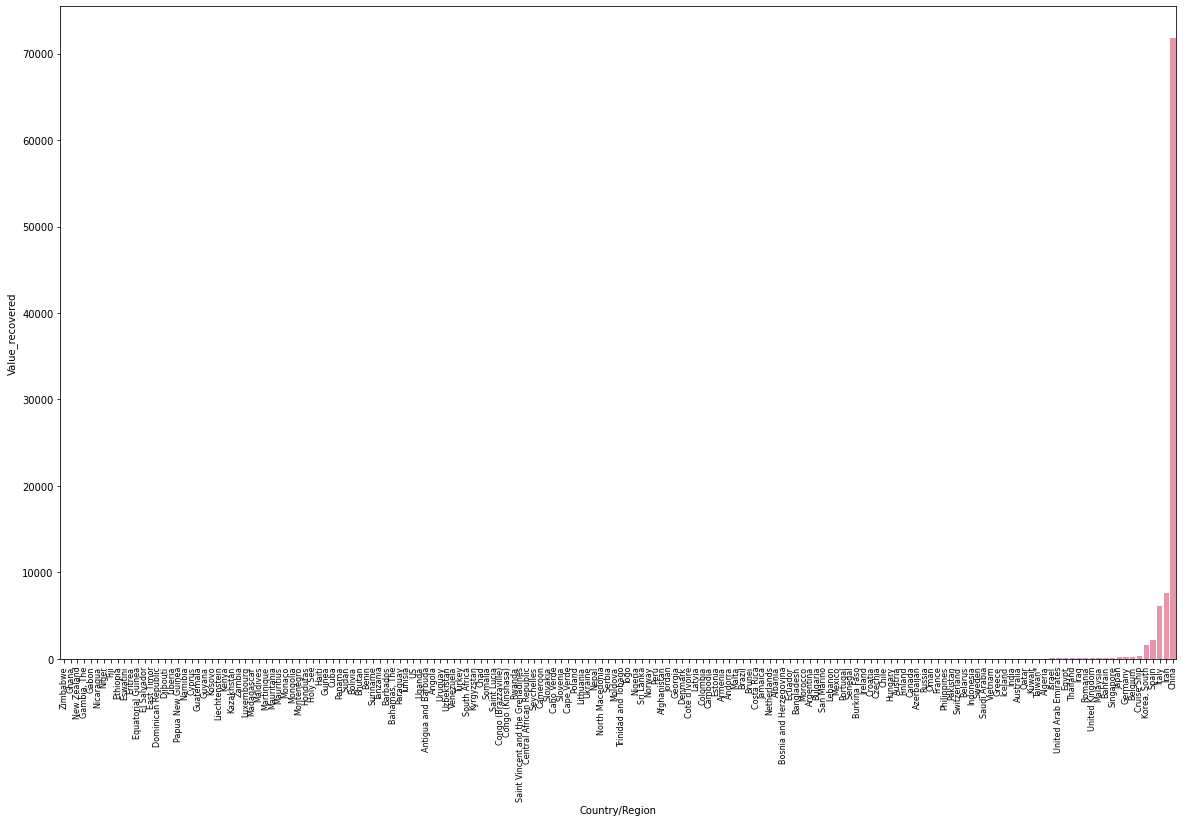

In [147]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
sns.barplot(x=todaycondition.sort_values(by='Value_recovered').index,y=todaycondition.sort_values(by='Value_recovered')['Value_recovered'])
plt.show()

In [186]:
todaycondition=todaycondition.sort_values(by='Value_confirmed')
todaycondition=todaycondition.loc[todaycondition['Value_confirmed']>300]
todaycondition

,Value_confirmed,Value_deaths,Value_recovered
Country/Region,,,
Bahrain,305,1,125
Russia,306,1,12
Estonia,306,0,1
Philippines,307,19,13
Peru,318,5,1
India,330,4,23
Romania,367,0,52
Slovenia,383,1,0
Saudi Arabia,392,0,16


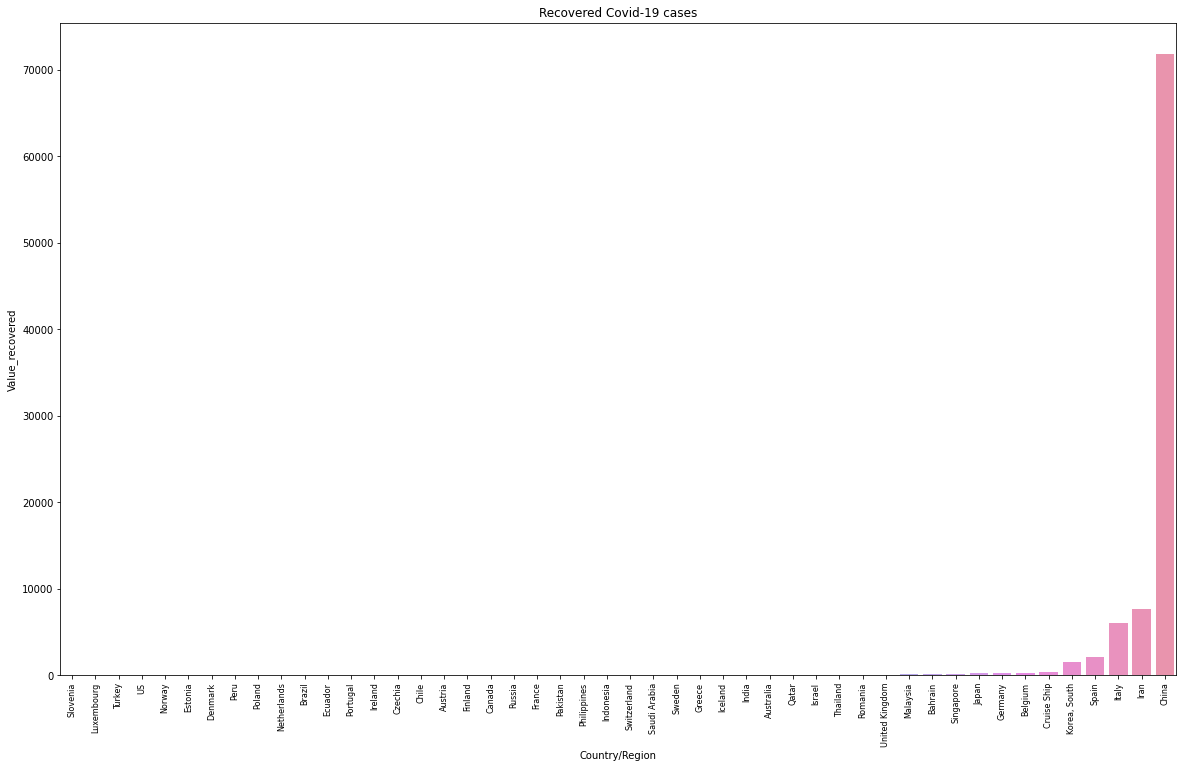

In [149]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
plt.title('Recovered Covid-19 cases')
plt.xlabel('Countries')
plt.ylabel('cases')
sns.barplot(x=todaycondition.sort_values(by='Value_recovered').index,y=todaycondition.sort_values(by='Value_recovered')['Value_recovered'])
plt.show()

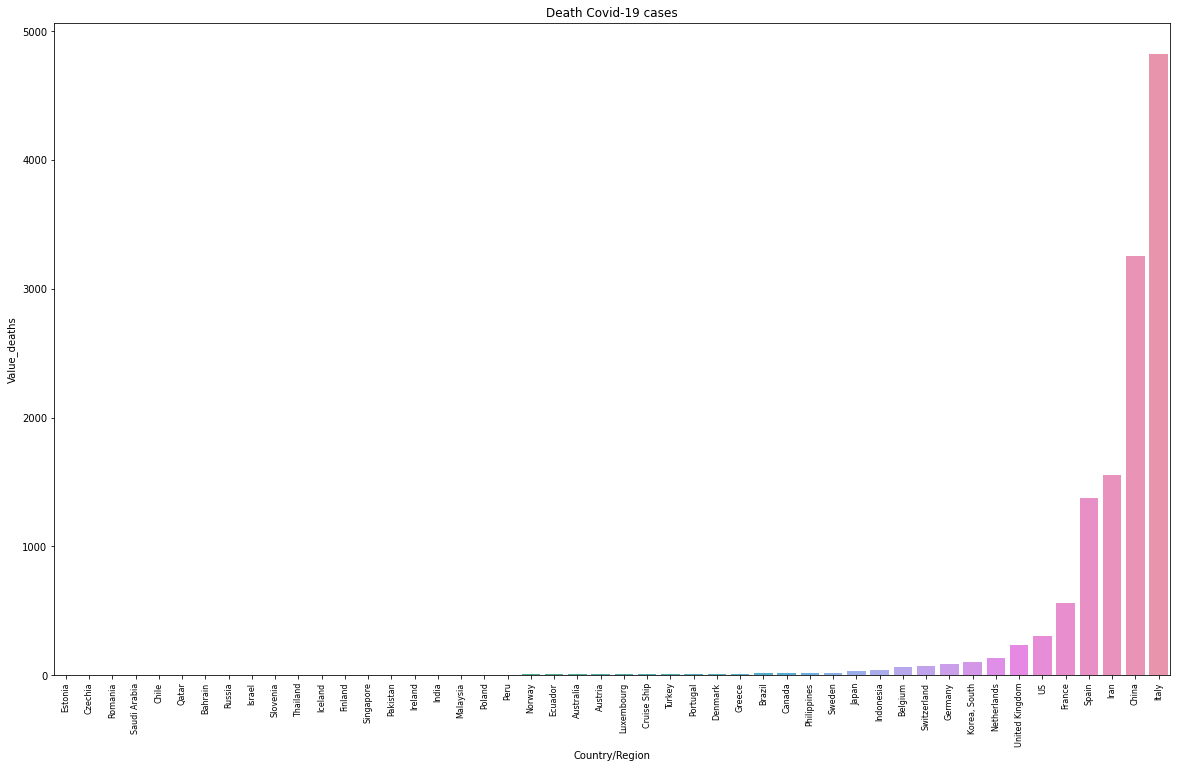

In [150]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
plt.title('Death Covid-19 cases')
plt.xlabel('Countries')
plt.ylabel('cases')
sns.barplot(x=todaycondition.sort_values(by='Value_deaths').index,y=todaycondition.sort_values(by='Value_deaths')['Value_deaths'])
plt.show()

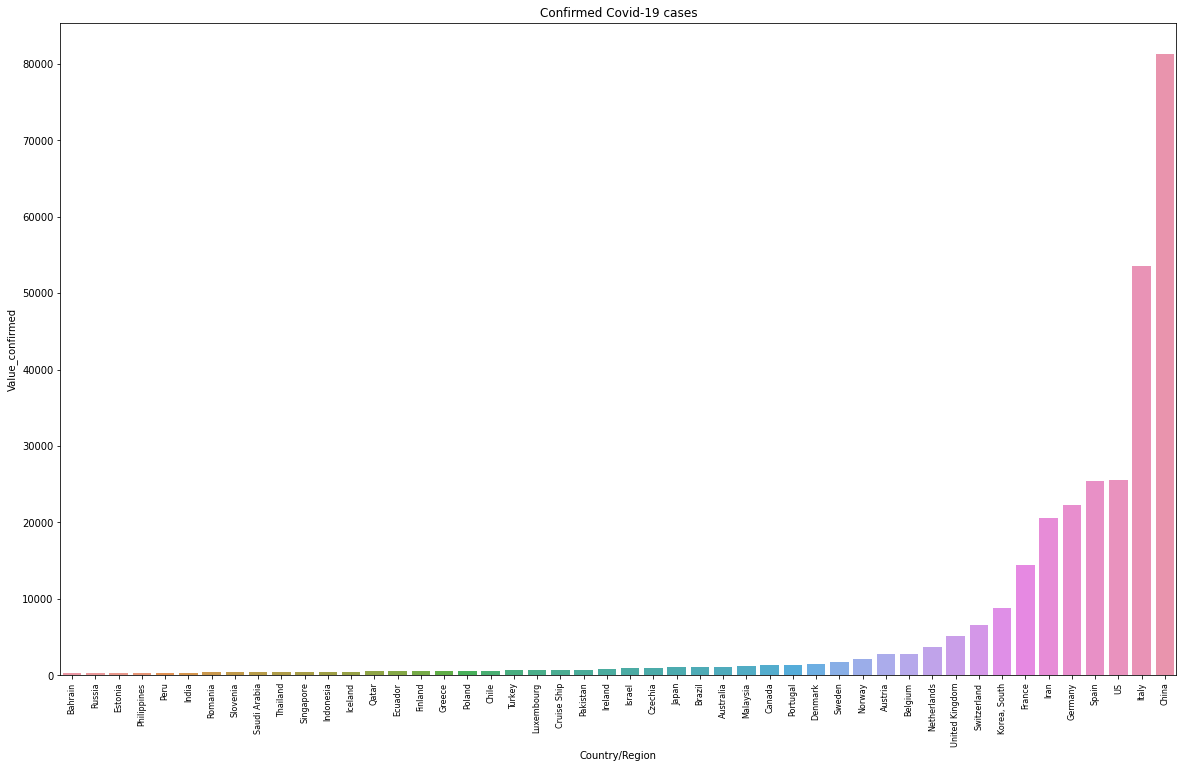

In [151]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90,fontsize=8)
plt.title('Confirmed Covid-19 cases')
plt.xlabel('Countries')
plt.ylabel('cases')
sns.barplot(x=todaycondition.sort_values(by='Value_confirmed').index,y=todaycondition.sort_values(by='Value_confirmed')['Value_confirmed'])
plt.show()

In [187]:
todaycondition.index.unique()

Index(['Bahrain', 'Russia', 'Estonia', 'Philippines', 'Peru', 'India',
       'Romania', 'Slovenia', 'Saudi Arabia', 'Thailand', 'Singapore',
       'Indonesia', 'Iceland', 'Qatar', 'Ecuador', 'Finland', 'Greece',
       'Poland', 'Chile', 'Turkey', 'Luxembourg', 'Cruise Ship', 'Pakistan',
       'Ireland', 'Israel', 'Czechia', 'Japan', 'Brazil', 'Australia',
       'Malaysia', 'Canada', 'Portugal', 'Denmark', 'Sweden', 'Norway',
       'Austria', 'Belgium', 'Netherlands', 'United Kingdom', 'Switzerland',
       'Korea, South', 'France', 'Iran', 'Germany', 'Spain', 'US', 'Italy',
       'China'],
      dtype='object', name='Country/Region')

In [0]:
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [158]:
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=2)
m_1

In [162]:
populationnewest

,Country Name,Country Code,2015
0,Aruba,ABW,103889.0
1,Andorra,AND,70473.0
2,Afghanistan,AFG,32526562.0
3,Angola,AGO,25021974.0
4,Albania,ALB,2889167.0
...,...,...,...
259,"Yemen, Rep.",YEM,26832215.0
260,South Africa,ZAF,54956920.0
261,"Congo, Dem. Rep.",COD,77266814.0
262,Zambia,ZMB,16211767.0


In [164]:
countries=list(todaycondition.index.unique())
countries

['Bahrain',
 'Russia',
 'Estonia',
 'Philippines',
 'Peru',
 'India',
 'Romania',
 'Slovenia',
 'Saudi Arabia',
 'Thailand',
 'Singapore',
 'Indonesia',
 'Iceland',
 'Qatar',
 'Ecuador',
 'Finland',
 'Greece',
 'Poland',
 'Chile',
 'Turkey',
 'Luxembourg',
 'Cruise Ship',
 'Pakistan',
 'Ireland',
 'Israel',
 'Czechia',
 'Japan',
 'Brazil',
 'Australia',
 'Malaysia',
 'Canada',
 'Portugal',
 'Denmark',
 'Sweden',
 'Norway',
 'Austria',
 'Belgium',
 'Netherlands',
 'United Kingdom',
 'Switzerland',
 'Korea, South',
 'France',
 'Iran',
 'Germany',
 'Spain',
 'US',
 'Italy',
 'China']

In [165]:
populationnewest=populationnewest.loc[populationnewest['Country Name'].isin(countries)]
len(populationnewest)

42

In [0]:
population=population[['Country Name','2015']]

In [225]:
uploaded3=files.upload()

Saving country_profile_variables.csv to country_profile_variables (1).csv


In [226]:
cprofile=pd.read_csv(io.BytesIO(uploaded3['country_profile_variables.csv']))
cprofile.head()


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2,70.7,2.8,3,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [227]:
countries

['Bahrain',
 'Russia',
 'Estonia',
 'Philippines',
 'Peru',
 'India',
 'Romania',
 'Slovenia',
 'Saudi Arabia',
 'Thailand',
 'Singapore',
 'Indonesia',
 'Iceland',
 'Qatar',
 'Ecuador',
 'Finland',
 'Greece',
 'Poland',
 'Chile',
 'Turkey',
 'Luxembourg',
 'Cruise Ship',
 'Pakistan',
 'Ireland',
 'Israel',
 'Czechia',
 'Japan',
 'Brazil',
 'Australia',
 'Malaysia',
 'Canada',
 'Portugal',
 'Denmark',
 'Sweden',
 'Norway',
 'Austria',
 'Belgium',
 'Netherlands',
 'United Kingdom',
 'Switzerland',
 'Korea, South',
 'France',
 'Iran',
 'Germany',
 'Spain',
 'United States',
 'Italy',
 'China']

In [228]:
todaycondition=todaycondition.rename(index={'US':'United States'})
countries=list(todaycondition.index.unique())
countries

['Bahrain',
 'Russia',
 'Estonia',
 'Philippines',
 'Peru',
 'India',
 'Romania',
 'Slovenia',
 'Saudi Arabia',
 'Thailand',
 'Singapore',
 'Indonesia',
 'Iceland',
 'Qatar',
 'Ecuador',
 'Finland',
 'Greece',
 'Poland',
 'Chile',
 'Turkey',
 'Luxembourg',
 'Cruise Ship',
 'Pakistan',
 'Ireland',
 'Israel',
 'Czechia',
 'Japan',
 'Brazil',
 'Australia',
 'Malaysia',
 'Canada',
 'Portugal',
 'Denmark',
 'Sweden',
 'Norway',
 'Austria',
 'Belgium',
 'Netherlands',
 'United Kingdom',
 'Switzerland',
 'Korea, South',
 'France',
 'Iran',
 'Germany',
 'Spain',
 'United States',
 'Italy',
 'China']

In [229]:
ncov21mar

,Country/Region,Value_confirmed,Value_deaths,Value_recovered
0,Bahrain,305,1,125
1,Russia,306,1,12
2,Estonia,306,0,1
3,Philippines,307,19,13
4,Peru,318,5,1
5,India,330,4,23
6,Romania,367,0,52
7,Slovenia,383,1,0
8,Saudi Arabia,392,0,16
9,Thailand,411,1,42


In [230]:
ncovprof=ncov21mar.merge(cprofile,left_on='Country/Region',right_on='country')
ncovprof

,Country/Region,Value_confirmed,Value_deaths,Value_recovered,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Bahrain,305,1,125,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126,2.9,22600.2,0.3,40.7,59.0,1,33.4,65.6,1.3,38.5/84.9,167,167,12892,14749,-1856,1124,2,88.8,1.7,2.1,77.5/75.6,19.7/4.6,704.1/51.1,0.4,6.9,5.0,0.9,2.7,101.8/100.6,101.9/102.4,59.4/30.9,7.5,185.3,93.5,36,0.8,31.3/23.0,961,413,100.0/100.0,99.2/99.2,-99,-99
1,Estonia,306,0,1,Estonia,NorthernEurope,45227,1310,30.9,88.2,22460,1.4,17112.0,3.4,27.4,69.2,3.8,29,67.3,7.2,55.4/69.4,136,136,13952,15759,-1807,493,-0.3,67.5,-0.4,1.6,81.2/71.8,16.4/25.9,202.3/15.4,84.2,3.2,6.4,3.3,5.5,98.5/98.3,114.7/115.6,84.8/55.4,26.7,148.7,88.4,23,52.7,19.5/14.8,242,193,100.0/99.0,97.5/96.6,-99,-99
2,Philippines,307,19,13,Philippines,South-easternAsia,300000,104918,351.9,101.3,292449,5.9,2904.2,10.5,31.3,58.2,27.7,16.3,56.1,5.9,50.8/78.9,122,120,56313,85909,-29596,7694,1.6,44.4,1.3,3,72.1/65.4,31.7/7.6,211.9/0.2,240.2,22.2,4.7,...,...,116.9/116.8,92.7/84.4,40.3/31.4,29.5,118.1,40.7,783,26.2,105.7/1.1,991,19,93.7/90.3,77.9/70.8,0.15,-99
3,Peru,318,5,1,Peru,SouthAmerica,1285216,32166,25.1,99.8,190428,3.3,6069.1,7.6,33.3,59.2,24.4,17.3,58.3,5.3,66.1/82.8,145,148,36040,36185,-145,-9210,1.3,78.6,1.7,2.5,76.8/71.5,27.4/10.4,90.9/0.3,2.5,18.6,5.5,1.1,4,101.7/101.7,95.8/95.7,.../...,27.7,109.9,40.9,685,57.9,61.7/2.0,1020,30,91.4/69.2,82.5/53.2,0.18,-99
4,India,330,4,23,India,SouthernAsia,3287263,1339180,450.4,107.6,2116239,7.6,1614.2,17,29.7,53.2,44.3,24.5,31.2,3.4,27.0/79.1,143,142,260327,356705,-96378,-22457,1.2,32.7,2.4,2.4,69.1/66.2,27.8/9.4,5241.0/0.4,211.1,41.3,4.7,0.7,3.8,115.1/102.8,74.5/73.5,26.7/27.0,11.8,78.8,26,1052,23.7,2238.4/1.7,23103,27,97.1/92.6,62.6/28.5,0.16,-99
5,Romania,367,0,52,Romania,EasternEurope,238391,19679,85.5,94.0,177956,3.7,9120.7,4.8,34.9,60.3,25.5,27.7,46.8,7.1,47.3/64.5,100,100,63581,74605,-11024,-2096,-0.6,54.6,~0.0,1.5,78.4/

In [0]:
ncovprof.to_csv('country_profile_coronacase_2020-03-21.csv')
!cp country_profile_coronacase_2020-03-21.csv "drive/My Drive/Self-Education/Covid-19"

In [232]:
ncovprof

,Country/Region,Value_confirmed,Value_deaths,Value_recovered,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Bahrain,305,1,125,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126,2.9,22600.2,0.3,40.7,59.0,1,33.4,65.6,1.3,38.5/84.9,167,167,12892,14749,-1856,1124,2,88.8,1.7,2.1,77.5/75.6,19.7/4.6,704.1/51.1,0.4,6.9,5.0,0.9,2.7,101.8/100.6,101.9/102.4,59.4/30.9,7.5,185.3,93.5,36,0.8,31.3/23.0,961,413,100.0/100.0,99.2/99.2,-99,-99
1,Estonia,306,0,1,Estonia,NorthernEurope,45227,1310,30.9,88.2,22460,1.4,17112.0,3.4,27.4,69.2,3.8,29,67.3,7.2,55.4/69.4,136,136,13952,15759,-1807,493,-0.3,67.5,-0.4,1.6,81.2/71.8,16.4/25.9,202.3/15.4,84.2,3.2,6.4,3.3,5.5,98.5/98.3,114.7/115.6,84.8/55.4,26.7,148.7,88.4,23,52.7,19.5/14.8,242,193,100.0/99.0,97.5/96.6,-99,-99
2,Philippines,307,19,13,Philippines,South-easternAsia,300000,104918,351.9,101.3,292449,5.9,2904.2,10.5,31.3,58.2,27.7,16.3,56.1,5.9,50.8/78.9,122,120,56313,85909,-29596,7694,1.6,44.4,1.3,3,72.1/65.4,31.7/7.6,211.9/0.2,240.2,22.2,4.7,...,...,116.9/116.8,92.7/84.4,40.3/31.4,29.5,118.1,40.7,783,26.2,105.7/1.1,991,19,93.7/90.3,77.9/70.8,0.15,-99
3,Peru,318,5,1,Peru,SouthAmerica,1285216,32166,25.1,99.8,190428,3.3,6069.1,7.6,33.3,59.2,24.4,17.3,58.3,5.3,66.1/82.8,145,148,36040,36185,-145,-9210,1.3,78.6,1.7,2.5,76.8/71.5,27.4/10.4,90.9/0.3,2.5,18.6,5.5,1.1,4,101.7/101.7,95.8/95.7,.../...,27.7,109.9,40.9,685,57.9,61.7/2.0,1020,30,91.4/69.2,82.5/53.2,0.18,-99
4,India,330,4,23,India,SouthernAsia,3287263,1339180,450.4,107.6,2116239,7.6,1614.2,17,29.7,53.2,44.3,24.5,31.2,3.4,27.0/79.1,143,142,260327,356705,-96378,-22457,1.2,32.7,2.4,2.4,69.1/66.2,27.8/9.4,5241.0/0.4,211.1,41.3,4.7,0.7,3.8,115.1/102.8,74.5/73.5,26.7/27.0,11.8,78.8,26,1052,23.7,2238.4/1.7,23103,27,97.1/92.6,62.6/28.5,0.16,-99
5,Romania,367,0,52,Romania,EasternEurope,238391,19679,85.5,94.0,177956,3.7,9120.7,4.8,34.9,60.3,25.5,27.7,46.8,7.1,47.3/64.5,100,100,63581,74605,-11024,-2096,-0.6,54.6,~0.0,1.5,78.4/

In [198]:
uploaded3=files.upload()

Saving LatLong.csv to LatLong.csv


In [199]:
countrymap=pd.read_csv(io.BytesIO(uploaded3['LatLong.csv']))
countrymap.head()

,Country,Code,Latitude,Longitude
0,Principality of Andorra,AD,42.55,1.58333
1,United Arab Emirates,AE,23.75,54.50000
2,Islamic Republic of Afghanistan,AF,33.00,66.00000
3,Antigua and Barbuda,AG,17.05,-61.80000
4,Republic of Albania,AL,41.00,20.00000


In [220]:
countrymap.Country.unique()

array(['Principality of Andorra', 'United Arab Emirates',
       'Islamic Republic of Afghanistan', 'Antigua and Barbuda',
       'Republic of Albania', 'Republic of Armenia', 'Republic of Angola',
       'Argentine Republic', 'Austria', 'Australia',
       'Republic of Azerbaijan', 'Bosnia and Herzegovina', 'Barbados',
       'Bangladesh', 'Belgium', 'Burkina Faso', 'Republic of Bulgaria',
       'Bahrain', 'Republic of Burundi', 'Republic of Benin',
       'Brunei Darussalam', 'Plurinational State of Bolivia', 'Brazil',
       'Commonwealth of The Bahamas', 'Kingdom of Bhutan',
       'Republic of Botswana', 'Republic of Belarus', 'Belize', 'Canada',
       'Democratic Republic of the Congo', 'Central African Republic',
       'Republic of the Congo', 'Switzerland',
       'Republic of Côte d’Ivoire', 'Chile', 'Republic of Cameroon',
       'China', 'Republic of Colombia', 'Republic of Costa Rica',
       'Republic of Cuba', 'Republic of Cabo Verde', 'Republic of Cyprus',
       'Cze

In [233]:
ncovproff=ncovprof.merge(countrymap,left_on='Country/Region',right_on='Country')
ncovproff

,Country/Region,Value_confirmed,Value_deaths,Value_recovered,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Country,Code,Latitude,Longitude
0,Bahrain,305,1,125,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126,2.9,22600.2,0.3,40.7,59.0,1,33.4,65.6,1.3,38.5/84.9,167,167,12892,14749,-1856,1124,2,88.8,1.7,2.1,77.5/75.6,19.7/4.6,704.1/51.1,0.4,6.9,5.0,0.9,2.7,101.8/100.6,101.9/102.4,59.4/30.9,7.5,185.3,93.5,36,0.8,31.3/23.0,961,413,100.0/100.0,99.2/99.2,-99,-99,Bahrain,BH,26.03333,50.55000
1,Estonia,306,0,1,Estonia,NorthernEurope,45227,1310,30.9,88.2,22460,1.4,17112.0,3.4,27.4,69.2,3.8,29,67.3,7.2,55.4/69.4,136,136,13952,15759,-1807,493,-0.3,67.5,-0.4,1.6,81.2/71.8,16.4/25.9,202.3/15.4,84.2,3.2,6.4,3.3,5.5,98.5/98.3,114.7/115.6,84.8/55.4,26.7,148.7,88.4,23,52.7,19.5/14.8,242,193,100.0/99.0,97.5/96.6,-99,-99,Estonia,EE,59.00000,26.00000
2,Philippines,307,19,13,Philippines,South-easternAsia,300000,104918,351.9,101.3,292449,5.9,2904.2,10.5,31.3,58.2,27.7,16.3,56.1,5.9,50.8/78.9,122,120,56313,85909,-29596,7694,1.6,44.4,1.3,3,72.1/65.4,31.7/7.6,211.9/0.2,240.2,22.2,4.7,...,...,116.9/116.8,92.7/84.4,40.3/31.4,29.5,118.1,40.7,783,26.2,105.7/1.1,991,19,93.7/90.3,77.9/70.8,0.15,-99,Philippines,PH,13.00000,122.00000
3,Peru,318,5,1,Peru,SouthAmerica,1285216,32166,25.1,99.8,190428,3.3,6069.1,7.6,33.3,59.2,24.4,17.3,58.3,5.3,66.1/82.8,145,148,36040,36185,-145,-9210,1.3,78.6,1.7,2.5,76.8/71.5,27.4/10.4,90.9/0.3,2.5,18.6,5.5,1.1,4,101.7/101.7,95.8/95.7,.../...,27.7,109.9,40.9,685,57.9,61.7/2.0,1020,30,91.4/69.2,82.5/53.2,0.18,-99,Peru,PE,-10.00000,-75.25000
4,India,330,4,23,India,SouthernAsia,3287263,1339180,450.4,107.6,2116239,7.6,1614.2,17,29.7,53.2,44.3,24.5,31.2,3.4,27.0/79.1,143,142,260327,356705,-96378,-22457,1.2,32.7,2.4,2.4,69.1/66.2,27.8/9.4,5241.0/0.4,211.1,41.3,4.7,0.7,3.8,115.1/102.8,74.5/73.5,26.7/27.0,11.8,78.8,26,1052,23.7,2238.4/1.7,23103,27,97.1/92.6,62.6/28.5,0.16,-99,India,IN,22.00000,79.00000
5,R

In [234]:
ncovproff=ncovproff.drop('Country',axis=1)
ncovproff

,Country/Region,Value_confirmed,Value_deaths,Value_recovered,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Code,Latitude,Longitude
0,Bahrain,305,1,125,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126,2.9,22600.2,0.3,40.7,59.0,1,33.4,65.6,1.3,38.5/84.9,167,167,12892,14749,-1856,1124,2,88.8,1.7,2.1,77.5/75.6,19.7/4.6,704.1/51.1,0.4,6.9,5.0,0.9,2.7,101.8/100.6,101.9/102.4,59.4/30.9,7.5,185.3,93.5,36,0.8,31.3/23.0,961,413,100.0/100.0,99.2/99.2,-99,-99,BH,26.03333,50.55000
1,Estonia,306,0,1,Estonia,NorthernEurope,45227,1310,30.9,88.2,22460,1.4,17112.0,3.4,27.4,69.2,3.8,29,67.3,7.2,55.4/69.4,136,136,13952,15759,-1807,493,-0.3,67.5,-0.4,1.6,81.2/71.8,16.4/25.9,202.3/15.4,84.2,3.2,6.4,3.3,5.5,98.5/98.3,114.7/115.6,84.8/55.4,26.7,148.7,88.4,23,52.7,19.5/14.8,242,193,100.0/99.0,97.5/96.6,-99,-99,EE,59.00000,26.00000
2,Philippines,307,19,13,Philippines,South-easternAsia,300000,104918,351.9,101.3,292449,5.9,2904.2,10.5,31.3,58.2,27.7,16.3,56.1,5.9,50.8/78.9,122,120,56313,85909,-29596,7694,1.6,44.4,1.3,3,72.1/65.4,31.7/7.6,211.9/0.2,240.2,22.2,4.7,...,...,116.9/116.8,92.7/84.4,40.3/31.4,29.5,118.1,40.7,783,26.2,105.7/1.1,991,19,93.7/90.3,77.9/70.8,0.15,-99,PH,13.00000,122.00000
3,Peru,318,5,1,Peru,SouthAmerica,1285216,32166,25.1,99.8,190428,3.3,6069.1,7.6,33.3,59.2,24.4,17.3,58.3,5.3,66.1/82.8,145,148,36040,36185,-145,-9210,1.3,78.6,1.7,2.5,76.8/71.5,27.4/10.4,90.9/0.3,2.5,18.6,5.5,1.1,4,101.7/101.7,95.8/95.7,.../...,27.7,109.9,40.9,685,57.9,61.7/2.0,1020,30,91.4/69.2,82.5/53.2,0.18,-99,PE,-10.00000,-75.25000
4,India,330,4,23,India,SouthernAsia,3287263,1339180,450.4,107.6,2116239,7.6,1614.2,17,29.7,53.2,44.3,24.5,31.2,3.4,27.0/79.1,143,142,260327,356705,-96378,-22457,1.2,32.7,2.4,2.4,69.1/66.2,27.8/9.4,5241.0/0.4,211.1,41.3,4.7,0.7,3.8,115.1/102.8,74.5/73.5,26.7/27.0,11.8,78.8,26,1052,23.7,2238.4/1.7,23103,27,97.1/92.6,62.6/28.5,0.16,-99,IN,22.00000,79.00000
5,Romania,367,0,52,Romania,EasternEurope,238391,19

In [235]:
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=2)

for i in range(0,len(ncovproff)):
    folium.Circle(
        location=[ncovproff.iloc[i]['Latitude'], ncovproff.iloc[i]['Longitude']],
        radius=15*ncovproff.iloc[i]['Value_confirmed'].astype('float'),
        popup="{}: {} confirmed cases".format(ncovproff.iloc[i]['Country/Region'],ncovproff.iloc[i]['Value_confirmed'])).add_to(m_1)

for idx, row in ncovproff.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup="{}: {} confirmed cases".format(ncovproff.iloc[idx]['Country/Region'],ncovproff.iloc[idx]['Value_confirmed'])).add_to(m_1)

m_1

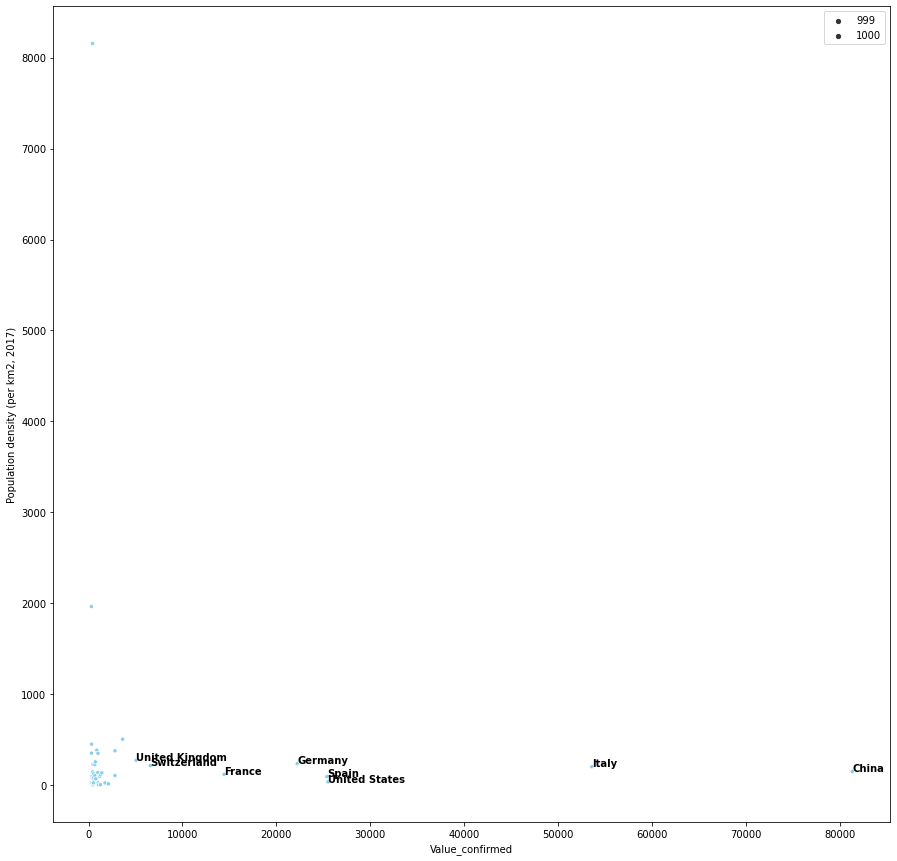

In [249]:
plt.figure(figsize=(15,15))
p1=sns.scatterplot(x=ncovproff['Value_confirmed'],y=ncovproff['Population density (per km2, 2017)'],marker='o',color='skyblue',size=1000)

for line in range(36,len(ncovproff)):
  p1.text(ncovproff['Value_confirmed'][line]+0.2,ncovproff['Population density (per km2, 2017)'][line],ncovproff['Country/Region'][line],horizontalalignment='left', size='medium', color='black', weight='semibold')

In [258]:
confirmed

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33,65,2020-03-21,24
2,NaN,Afghanistan,33,65,2020-03-20,24
3,NaN,Afghanistan,33,65,2020-03-19,22
4,NaN,Afghanistan,33,65,2020-03-18,22
5,NaN,Afghanistan,33,65,2020-03-17,22
...,...,...,...,...,...,...
28916,NaN,Zimbabwe,-20,30,2020-01-26,0
28917,NaN,Zimbabwe,-20,30,2020-01-25,0
28918,NaN,Zimbabwe,-20,30,2020-01-24,0
28919,NaN,Zimbabwe,-20,30,2020-01-23,0


In [259]:
confirmed['Value']=pd.to_numeric(confirmed['Value'])
confirmed

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33,65,2020-03-21,24
2,NaN,Afghanistan,33,65,2020-03-20,24
3,NaN,Afghanistan,33,65,2020-03-19,22
4,NaN,Afghanistan,33,65,2020-03-18,22
5,NaN,Afghanistan,33,65,2020-03-17,22
...,...,...,...,...,...,...
28916,NaN,Zimbabwe,-20,30,2020-01-26,0
28917,NaN,Zimbabwe,-20,30,2020-01-25,0
28918,NaN,Zimbabwe,-20,30,2020-01-24,0
28919,NaN,Zimbabwe,-20,30,2020-01-23,0


In [261]:
confirmedChina=confirmed.loc[confirmed['Country/Region']=='China']
confirmedChina

,Province/State,Country/Region,Lat,Long,Date,Value
3121,Anhui,China,31.8257,117.2264,2020-03-21,990
3122,Anhui,China,31.8257,117.2264,2020-03-20,990
3123,Anhui,China,31.8257,117.2264,2020-03-19,990
3124,Anhui,China,31.8257,117.2264,2020-03-18,990
3125,Anhui,China,31.8257,117.2264,2020-03-17,990
...,...,...,...,...,...,...
5096,Zhejiang,China,29.1832,120.0934,2020-01-26,104
5097,Zhejiang,China,29.1832,120.0934,2020-01-25,62
5098,Zhejiang,China,29.1832,120.0934,2020-01-24,43
5099,Zhejiang,China,29.1832,120.0934,2020-01-23,27


In [262]:
confirmedChina['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [0]:
confirmedChina=confirmedChina.iloc[::-1]

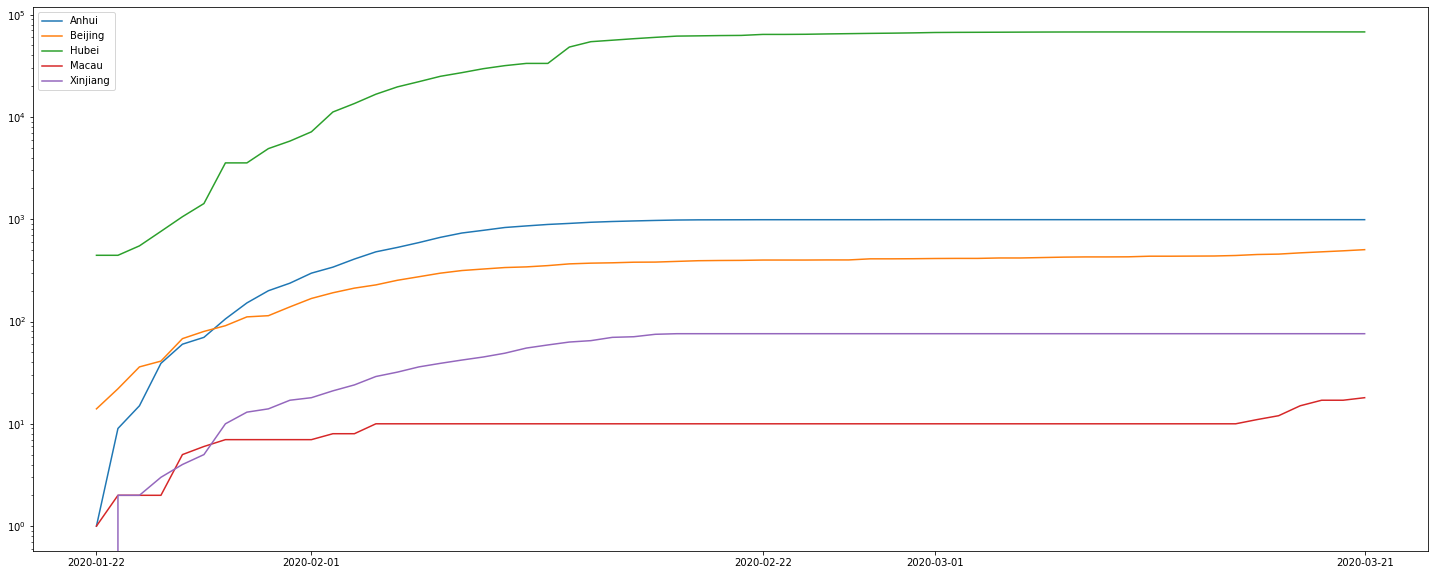

In [283]:
plt.figure(figsize=(25,10))
plt.plot(confirmedChina.loc[confirmedChina['Province/State']=='Anhui']['Date'],confirmedChina.loc[confirmedChina['Province/State']=='Anhui']['Value'],label='Anhui')
plt.plot(confirmedChina.loc[confirmedChina['Province/State']=='Beijing']['Date'],confirmedChina.loc[confirmedChina['Province/State']=='Beijing']['Value'],label='Beijing')
plt.plot(confirmedChina.loc[confirmedChina['Province/State']=='Hubei']['Date'],confirmedChina.loc[confirmedChina['Province/State']=='Hubei']['Value'],label='Hubei')
plt.plot(confirmedChina.loc[confirmedChina['Province/State']=='Macau']['Date'],confirmedChina.loc[confirmedChina['Province/State']=='Macau']['Value'],label='Macau')
plt.plot(confirmedChina.loc[confirmedChina['Province/State']=='Xinjiang']['Date'],confirmedChina.loc[confirmedChina['Province/State']=='Xinjiang']['Value'],label='Xinjiang')
plt.legend()
plt.yscale('log')
plt.xticks(['2020-01-22','2020-02-01','2020-02-22','2020-03-01','2020-03-21'])
plt.show()